In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(r"data_complete.csv",
                       header = 0,
                       sep=',')
data

,LOCATION,Country,VARIABLE,Variable,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,XGS,"Exports of goods and services, nominal value (...",Q,Quarterly,1995-Q1,Q1-1995,AUD,Australian Dollar,0,Units,NaN,NaN,9.118208e+10,NaN,NaN
1,AUS,Australia,XGS,"Exports of goods and services, nominal value (...",Q,Quarterly,1995-Q2,Q2-1995,AUD,Australian Dollar,0,Units,NaN,NaN,9.311545e+10,NaN,NaN
2,AUS,Australia,XGS,"Exports of goods and services, nominal value (...",Q,Quarterly,1995-Q3,Q3-1995,AUD,Australian Dollar,0,Units,NaN,NaN,9.736477e+10,NaN,NaN
3,AUS,Australia,XGS,"Exports of goods and services, nominal value (...",Q,Quarterly,1995-Q4,Q4-1995,AUD,Australian Dollar,0,Units,NaN,NaN,9.696970e+10,NaN,NaN
4,AUS,Australia,XGS,"Exports of goods and services, nominal value (...",Q,Quarterly,1996-Q1,Q1-1996,AUD,Australian Dollar,0,Units,NaN,NaN,1.024979e+11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q1,Q1-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.003470e+11,NaN,NaN
20196,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q2,Q2-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.016932e+11,NaN,NaN
20197,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q3,Q3-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.030033e+11,NaN,NaN
20198,DNK,Denmark,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,2019-Q4,Q4-2019,USD,US Dollar,0,Units,2015.0,2015.0,3.042660e+11,NaN,NaN


In [6]:
df = data.copy()
df.nunique()

LOCATION                    25
Country                     25
VARIABLE                     8
Variable                     8
FREQUENCY                    1
Frequency                    1
TIME                       101
Time                       101
Unit Code                   16
Unit                        16
PowerCode Code               1
PowerCode                    1
Reference Period Code        2
Reference Period             2
Value                    20080
Flag Codes                   0
Flags                        0
dtype: int64

In [7]:
df.isna().sum()

LOCATION                     0
Country                      0
VARIABLE                     0
Variable                     0
FREQUENCY                    0
Frequency                    0
TIME                         0
Time                         0
Unit Code                    0
Unit                         0
PowerCode Code               0
PowerCode                    0
Reference Period Code    17675
Reference Period         17675
Value                        0
Flag Codes               20200
Flags                    20200
dtype: int64

In [8]:
df = df.drop(columns = ['Country', 'FREQUENCY', 'Frequency', 'Time', 'Variable', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])
df

,LOCATION,VARIABLE,TIME,Value
0,AUS,XGS,1995-Q1,9.118208e+10
1,AUS,XGS,1995-Q2,9.311545e+10
2,AUS,XGS,1995-Q3,9.736477e+10
3,AUS,XGS,1995-Q4,9.696970e+10
4,AUS,XGS,1996-Q1,1.024979e+11
...,...,...,...,...
20195,DNK,GDPVD,2019-Q1,3.003470e+11
20196,DNK,GDPVD,2019-Q2,3.016932e+11
20197,DNK,GDPVD,2019-Q3,3.030033e+11
20198,DNK,GDPVD,2019-Q4,3.042660e+11


In [12]:
df_gdp = df.where(df['VARIABLE'] == 'GDPVD').dropna()
df_lf = df.where(df['VARIABLE'] == 'LF').dropna()
df_emp = df.where(df['VARIABLE'] == 'ET').dropna()
df_x = df.where(df['VARIABLE'] == 'XGS').dropna()
df_inv = df.where(df['VARIABLE'] == 'IT').dropna()
df_conso = df.where(df['VARIABLE'] == 'CP').dropna()
df_cho = df.where(df['VARIABLE'] == 'UNR').dropna()
df_nom = df.where(df['VARIABLE'] == 'GDP').dropna()


In [13]:
df_merge = df_gdp.merge(df_lf,on=['LOCATION', 'TIME'], how='left')
df_merge = df_merge.rename(columns={"Value_x": "PIB", "Value_y": "Actifs"})

In [14]:
df_merge = df_merge.merge(df_emp,on=['LOCATION', 'TIME'], how='left')
df_merge = df_merge.rename(columns={"Value": "Emplois"})

df_merge = df_merge.merge(df_conso,on=['LOCATION', 'TIME'], how='left')
df_merge = df_merge.merge(df_inv,on=['LOCATION', 'TIME'], how='left')
df_merge = df_merge.rename(columns={"Value_x": "Conso", "Value_y": "Invest"})

df_merge = df_merge.merge(df_x,on=['LOCATION', 'TIME'], how='left')
df_merge = df_merge.merge(df_cho,on=['LOCATION', 'TIME'], how='left')
df_merge = df_merge.rename(columns={"Value_x": "Exports", "Value_y": "Chomage"})

In [15]:
df_merge = df_merge.drop(columns = ['VARIABLE_x', 'VARIABLE_y', 'VARIABLE_x', 'VARIABLE_y', 'VARIABLE_x', 'VARIABLE_y', 'VARIABLE'])

In [16]:
df_merge = df_merge.merge(df_nom, on=['LOCATION', 'TIME'], how='left')
df_merge = df_merge.rename(columns={"Value": "Nom PIB"})
del df_merge['VARIABLE']

In [17]:
df_merge['ID_country'] = df_merge.groupby('LOCATION').ngroup().add(1)
df_merge

,LOCATION,TIME,PIB,Actifs,Emplois,Conso,Invest,Exports,Chomage,Nom PIB,ID_country
0,AUS,1995-Q1,5.774222e+11,8.856843e+06,8.077377e+06,2.881696e+11,1.226662e+11,9.118208e+10,8.800723,4.973901e+11,1
1,AUS,1995-Q2,5.798731e+11,8.939832e+06,8.188265e+06,2.950128e+11,1.204227e+11,9.311545e+10,8.406955,5.044334e+11,1
2,AUS,1995-Q3,5.930460e+11,8.969251e+06,8.222506e+06,2.983028e+11,1.282283e+11,9.736477e+10,8.325610,5.154969e+11,1
3,AUS,1995-Q4,5.937527e+11,9.020135e+06,8.267100e+06,3.025338e+11,1.221589e+11,9.696970e+10,8.348373,5.254436e+11,1
4,AUS,1996-Q1,6.034454e+11,9.040712e+06,8.280916e+06,3.068582e+11,1.263310e+11,1.024979e+11,8.404165,5.321506e+11,1
...,...,...,...,...,...,...,...,...,...,...,...
2520,DNK,2019-Q1,3.003470e+11,3.032481e+06,2.884279e+06,1.067011e+12,4.811036e+11,1.262447e+12,4.887160,2.272627e+12,7
2521,DNK,2019-Q2,3.016932e+11,3.038528e+06,2.890747e+06,1.076567e+12,4.892435e+11,1.277812e+12,4.863579,2.291906e+12,7
2522,DNK,2019-Q3,3.030033e+11,3.044587e+06,2.897229e+06,1.086211e+12,4.967023e+11,1.292735e+12,4.839993,2.311431e+12,7
2523,DNK,2019-Q4,3.042660e+11,3.050658e+06,2.903726e+06,1.095941e+12,5.034735e+11,1.307835e+12,4.816400,2.330878e+12,7


In [18]:
df_merge.nunique()

LOCATION        25
TIME           101
PIB           2520
Actifs        2496
Emplois       2499
Conso         2525
Invest        2519
Exports       2523
Chomage       2496
Nom PIB       2524
ID_country      25
dtype: int64

In [19]:
df_merge['Conso_share'] = df_merge['Conso']/df_merge['Nom PIB']
df_merge['Invest_share'] = df_merge['Invest']/df_merge['Nom PIB']
df_merge['Export_share'] = df_merge['Exports']/df_merge['Nom PIB']

In [20]:
df_merge = df_merge.drop(columns = ['Conso', 'Invest', 'Exports', 'Nom PIB'])

In [21]:
df_merge.describe()

,PIB,Actifs,Emplois,Chomage,ID_country,Conso_share,Invest_share,Export_share
count,2.525000e+03,2.525000e+03,2.525000e+03,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000
mean,1.633735e+12,1.866920e+07,1.744387e+07,6.971445,13.000000,0.537102,0.225885,0.481794
std,3.161521e+12,3.102085e+07,2.930792e+07,3.609830,7.212531,0.074464,0.036637,0.339759
min,8.373701e+09,1.469793e+05,1.409016e+05,1.757308,1.000000,0.298446,0.128144,0.086466
25%,2.362360e+11,2.710058e+06,2.518976e+06,4.449799,7.000000,0.497592,0.203209,0.278621
50%,4.511835e+11,5.046507e+06,4.630200e+06,6.105829,13.000000,0.542972,0.222967,0.391075
75%,1.787880e+12,2.420986e+07,2.230344e+07,8.441125,19.000000,0.578609,0.241635,0.556403
max,2.030605e+13,1.643069e+08,1.584823e+08,26.206330,25.000000,0.686600,0.394392,2.279008


In [22]:
df_merge.LOCATION.unique()

array(['AUS', 'AUT', 'CAN', 'FIN', 'FRA', 'IRL', 'JPN', 'NLD', 'NZL',
       'NOR', 'LUX', 'CHE', 'ESP', 'SVK', 'ITA', 'HUN', 'PRT', 'USA',
       'ISL', 'DEU', 'GBR', 'BEL', 'SWE', 'KOR', 'DNK'], dtype=object)

In [23]:
list_pays = ['AUS', 'AUT', 'CAN', 'FIN', 'FRA', 'IRL', 'JPN', 'NLD', 'NZL',
       'NOR', 'LUX', 'CHE', 'ESP', 'SVK', 'ITA', 'HUN', 'PRT', 'USA',
       'ISL', 'DEU', 'GBR', 'BEL', 'SWE', 'KOR', 'DNK']
list_df = []

In [24]:
for pays in list_pays:
    df = df_merge.where(df_merge['LOCATION'] == pays).dropna().reset_index()
    df['Labor_prod'] = np.log(df['PIB']/df['Emplois']) - np.log(df['PIB'].shift()/df['Emplois'].shift())
    df['Labor_prod'][0] = 0

    for i in range(1,101):
        df['PIB'][i] = (df['PIB'][i] - df['PIB'][0]) / df['PIB'][0]
        df['Actifs'][i] = (df['Actifs'][i] - df['Actifs'][0]) / df['Actifs'][0]
        df['Emplois'][i] = (df['Emplois'][i] - df['Emplois'][0]) / df['Emplois'][0]
    df['PIB'][0] = 0
    df['Actifs'][0] = 0
    df['Emplois'][0] = 0
    list_df.append(df)

<ipython-input-24-d0106983c2fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labor_prod'][0] = 0
<ipython-input-24-d0106983c2fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PIB'][i] = (df['PIB'][i] - df['PIB'][0]) / df['PIB'][0]
<ipython-input-24-d0106983c2fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actifs'][i] = (df['Actifs'][i] - df['Actifs'][0]) / df['Actifs'][0]
<ipython-input-24-d0106983c2fc>:9: Setti

<ipython-input-24-d0106983c2fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PIB'][0] = 0
<ipython-input-24-d0106983c2fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actifs'][0] = 0
<ipython-input-24-d0106983c2fc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emplois'][0] = 0
<ipython-input-24-d0106983c2fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

<ipython-input-24-d0106983c2fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PIB'][0] = 0
<ipython-input-24-d0106983c2fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actifs'][0] = 0
<ipython-input-24-d0106983c2fc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emplois'][0] = 0
<ipython-input-24-d0106983c2fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

<ipython-input-24-d0106983c2fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labor_prod'][0] = 0
<ipython-input-24-d0106983c2fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PIB'][i] = (df['PIB'][i] - df['PIB'][0]) / df['PIB'][0]
<ipython-input-24-d0106983c2fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actifs'][i] = (df['Actifs'][i] - df['Actifs'][0]) / df['Actifs'][0]
<ipython-input-24-d0106983c2fc>:9: Setti

<ipython-input-24-d0106983c2fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PIB'][0] = 0
<ipython-input-24-d0106983c2fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actifs'][0] = 0
<ipython-input-24-d0106983c2fc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emplois'][0] = 0
<ipython-input-24-d0106983c2fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

<ipython-input-24-d0106983c2fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actifs'][i] = (df['Actifs'][i] - df['Actifs'][0]) / df['Actifs'][0]
<ipython-input-24-d0106983c2fc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emplois'][i] = (df['Emplois'][i] - df['Emplois'][0]) / df['Emplois'][0]
<ipython-input-24-d0106983c2fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PIB'][0] = 0
<ipython-input-24-d0106983c2fc

In [25]:
list_df[1]

,index,LOCATION,TIME,PIB,Actifs,Emplois,Chomage,ID_country,Conso_share,Invest_share,Export_share,Labor_prod
0,101,AUT,1995-Q1,0.000000,0.000000,0.000000,3.797693,2.0,0.551017,0.254642,0.330232,0.000000
1,102,AUT,1995-Q2,0.006923,-0.003198,-0.002882,3.767207,2.0,0.549676,0.252756,0.334090,0.009786
2,103,AUT,1995-Q3,0.014129,-0.003698,-0.002986,3.728992,2.0,0.549724,0.252405,0.337508,0.007235
3,104,AUT,1995-Q4,0.021116,-0.007406,-0.007182,3.775972,2.0,0.551028,0.253489,0.339885,0.011083
4,105,AUT,1996-Q1,0.025869,-0.008847,-0.015566,4.449799,2.0,0.559429,0.252919,0.344690,0.013124
...,...,...,...,...,...,...,...,...,...,...,...,...
96,197,AUT,2019-Q1,0.565181,0.176149,0.165493,4.669294,2.0,0.519116,0.241760,0.546967,0.000678
97,198,AUT,2019-Q2,0.570954,0.178494,0.168396,4.622042,2.0,0.519466,0.241926,0.541467,0.001194
98,199,AUT,2019-Q3,0.577271,0.180844,0.171306,4.574766,2.0,0.519850,0.241437,0.538738,0.001525
99,200,AUT,2019-Q4,0.583672,0.183199,0.174223,4.527468,2.0,0.522549,0.237871,0.540014,0.001563


In [26]:
df_new = pd.concat(list_df)
#df_new.to_csv(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\dfR_complete.csv', index = False)

In [27]:
df_pib = df_new[['LOCATION', 'TIME', 'PIB']]
df_pib

,LOCATION,TIME,PIB
0,AUS,1995-Q1,0.000000
1,AUS,1995-Q2,0.004244
2,AUS,1995-Q3,0.027058
3,AUS,1995-Q4,0.028282
4,AUS,1996-Q1,0.045068
...,...,...,...
96,DNK,2019-Q1,0.440993
97,DNK,2019-Q2,0.447451
98,DNK,2019-Q3,0.453737
99,DNK,2019-Q4,0.459795


In [62]:
w = pd.read_csv(r"pond_r_bl.csv",header = 0,
                       sep=',')
w

,Unnamed: 0,w.weight
0,1,2.252270e-07
1,2,1.788433e-07
2,3,3.596738e-07
3,4,8.648076e-02
4,5,4.867521e-09
5,6,2.790854e-07
6,7,5.958780e-05
7,8,9.999801e-08
8,9,7.424902e-08
9,10,5.291754e-07


<AxesSubplot:>

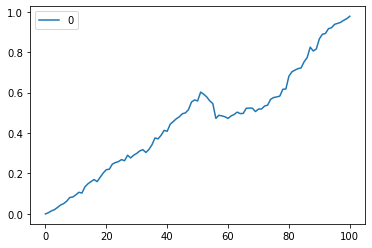

In [45]:
df_pivot = df_pib.pivot("TIME", "LOCATION", "PIB")

pred = df_pivot.drop('USA', axis = 1).to_numpy() @ w['w.weight']
pred_pib = pd.DataFrame(pred)
pred_pib.plot()

In [31]:
#pred_pib.to_csv(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\pred_pib.csv', index = False)

In [31]:
df_chomage = df_new[['LOCATION', 'TIME', 'Chomage']]
df_pivot3 = df_chomage.pivot("TIME", "LOCATION", "Chomage")
df_pivot3

LOCATION,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,...,JPN,KOR,LUX,NLD,NOR,NZL,PRT,SVK,SWE,USA
TIME,,,,,,,,,,,,,,,,,,,,,
1995-Q1,8.800723,3.797693,9.666667,9.606327,4.065058,8.136752,6.911790,19.613489,16.638657,10.238691,...,3.008761,2.104850,2.579998,8.076283,5.298988,6.786315,7.193715,13.801558,10.564857,5.479974
1995-Q2,8.406955,3.767207,9.600000,9.495567,3.843548,8.096542,6.731489,19.310448,16.220012,10.026678,...,3.063983,2.006883,2.600742,8.288571,4.874627,6.413832,7.263381,13.470441,10.298645,5.676733
1995-Q3,8.325610,3.728992,9.666667,9.478641,3.627469,8.257038,6.708686,19.360807,16.854137,9.848152,...,3.183315,2.090545,2.562216,8.305672,4.573142,6.250000,7.170008,12.689078,10.259363,5.660601
1995-Q4,8.348373,3.775972,9.800000,9.306041,3.768013,8.440948,6.685602,19.138068,16.643075,9.965045,...,3.342159,2.064697,2.618083,8.157054,4.209512,6.407448,7.342648,12.455974,10.778367,5.574337
1996-Q1,8.404165,4.449799,9.866667,9.508656,3.895048,8.567764,6.701037,18.738971,16.239612,10.329495,...,3.365289,1.944357,2.673199,7.919738,4.932738,6.362153,7.290723,11.794427,10.833895,5.547865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-Q1,4.964318,4.669294,5.747986,5.780595,4.849673,3.204242,4.887160,14.132698,6.778301,8.826259,...,2.459016,3.930219,5.251942,3.427332,3.628328,4.181687,6.451197,5.882305,6.245866,3.878841
2019-Q2,5.096521,4.622042,5.705921,5.827413,4.728629,3.093450,4.863579,13.885871,6.731713,8.751410,...,2.429785,3.930219,5.214284,3.571686,3.571129,4.141700,6.358529,5.804924,6.236505,3.759864
2019-Q3,5.190859,4.574766,5.659118,5.874206,4.598547,2.989753,4.839993,13.638206,6.675774,8.683355,...,2.420522,3.891776,5.167183,3.667826,3.528194,4.171690,6.265768,5.727479,6.227143,3.664530


In [32]:
predcho = df_pivot3.drop('USA', axis = 1).to_numpy() @ w['w.weight']
pred_cho = pd.DataFrame(predcho)
pred_cho

,0
0,6.527352
1,6.395073
2,6.289614
3,6.246619
4,6.195056
...,...
96,3.771093
97,3.767966
98,3.767839
99,3.782809


In [33]:
chop = pred_cho[0] + np.std(df_pivot3['USA'][0:86].to_numpy() - pred_cho[0:86].to_numpy())
chom = pred_cho[0] - np.std(df_pivot3['USA'][0:86].to_numpy() - pred_cho[0:86].to_numpy())

<AxesSubplot:xlabel='TIME'>

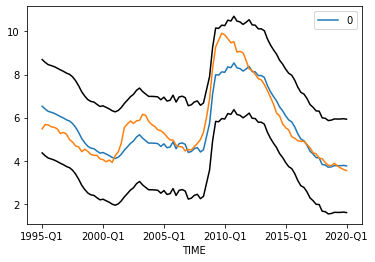

In [34]:
pred_cho.plot()
df_pivot3['USA'].plot()
chop.plot(color = 'black')
chom.plot(color = 'black')

In [37]:
plot_cho = [df_pivot3['USA'].reset_index(drop= True), pred_cho[0], chom.reset_index(drop= True), chop.reset_index(drop= True)]
headers = ['USA_cho', 'sc_cho', 'chom', 'chop']
df_plot_cho = pd.concat(plot_cho, keys = headers, axis = 1)
df_plot_cho
#df_plot_cho.to_csv(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\pred_cho.csv', index = False)

,USA_cho,sc_cho,chom,chop
0,5.479974,6.527352,4.360717,8.693987
1,5.676733,6.395073,4.228438,8.561708
2,5.660601,6.289614,4.122979,8.456249
3,5.574337,6.246619,4.079984,8.413254
4,5.547865,6.195056,4.028421,8.361691
...,...,...,...,...
96,3.878841,3.771093,1.604458,5.937728
97,3.759864,3.767966,1.601331,5.934601
98,3.664530,3.767839,1.601204,5.934474
99,3.592860,3.782809,1.616174,5.949444


In [38]:
#EMPLOIS
df_emplois = df_new[['LOCATION', 'TIME', 'Emplois']]
df_pivot_emp = df_emplois.pivot("TIME", "LOCATION", "Emplois")
predemp = df_pivot_emp.drop('USA', axis = 1).to_numpy() @ w['w.weight']
pred_emp = pd.DataFrame(predemp)
pred_emp

,0
0,0.000000
1,0.003088
2,0.006527
3,0.008074
4,0.008436
...,...
96,0.286852
97,0.288826
98,0.290701
99,0.292386


In [39]:
empp = pred_emp[0] + np.std(df_pivot_emp['USA'][0:86].to_numpy() - pred_emp[0:86].to_numpy())
empm = pred_emp[0] - np.std(df_pivot_emp['USA'][0:86].to_numpy() - pred_emp[0:86].to_numpy())

In [40]:
plot_emp = [df_pivot_emp['USA'].reset_index(drop= True), pred_emp[0], empm.reset_index(drop= True), empp.reset_index(drop= True)]
headers = ['USA_emp', 'sc_emp', 'empm', 'empp']
df_plot_emp = pd.concat(plot_emp, keys = headers, axis = 1)
df_plot_emp
#df_plot_emp.to_csv(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\pred_emp.csv', index = False)

,USA_emp,sc_emp,empm,empp
0,0.000000,0.000000,-0.077758,0.077758
1,-0.001757,0.003088,-0.074671,0.080846
2,0.000681,0.006527,-0.071231,0.084286
3,0.002985,0.008074,-0.069684,0.085833
4,0.005553,0.008436,-0.069322,0.086195
...,...,...,...,...
96,0.255896,0.286852,0.209093,0.364610
97,0.259958,0.288826,0.211067,0.366584
98,0.263721,0.290701,0.212943,0.368460
99,0.266869,0.292386,0.214627,0.370144


In [41]:
#Actifs
df_actifs = df_new[['LOCATION', 'TIME', 'Actifs']]
df_pivot_actifs = df_actifs.pivot("TIME", "LOCATION", "Actifs")
predactifs = df_pivot_actifs.drop('USA', axis = 1).to_numpy() @ w['w.weight']
pred_actifs = pd.DataFrame(predactifs)
pred_actifs

,0
0,0.000000
1,0.001613
2,0.003872
3,0.004935
4,0.004820
...,...
96,0.245727
97,0.247610
98,0.249421
99,0.251230


In [42]:
actp = pred_actifs[0] + np.std(df_pivot_actifs['USA'][0:86].to_numpy() - pred_actifs[0:86].to_numpy())
actm = pred_actifs[0] - np.std(df_pivot_actifs['USA'][0:86].to_numpy() - pred_actifs[0:86].to_numpy())

In [43]:
plot_actifs = [df_pivot_actifs['USA'].reset_index(drop= True), pred_actifs[0], actm.reset_index(drop= True), actp.reset_index(drop= True)]
headers = ['USA_act', 'sc_act', 'actm', 'actp']
df_plot_actifs = pd.concat(plot_actifs, keys = headers, axis = 1)
df_plot_actifs
#df_plot_actifs.to_csv(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\STAT APP\pred_actifs.csv', index = False)

,USA_act,sc_act,actm,actp
0,0.000000,0.000000,-0.083530,0.083530
1,0.000326,0.001613,-0.081917,0.085143
2,0.002597,0.003872,-0.079658,0.087402
3,0.003987,0.004935,-0.078595,0.088465
4,0.006276,0.004820,-0.078710,0.088350
...,...,...,...,...
96,0.234976,0.245727,0.162197,0.329257
97,0.237439,0.247610,0.164080,0.331140
98,0.239907,0.249421,0.165891,0.332951
99,0.242071,0.251230,0.167700,0.334760


In [61]:
graph_baseline = pd.concat([pred_pib, df_plot_cho, df_plot_emp, df_plot_actifs], axis = 1)
graph_baseline = graph_baseline.drop(['chom', 'chop', 'empm', 'empp', 'actm', 'actp'], axis=1)
graph_baseline = graph_baseline.rename({0:'USA_pib'}, axis=1)
graph_baseline

,USA_pib,USA_cho,sc_cho,USA_emp,sc_emp,USA_act,sc_act
0,0.000000,5.479974,6.527352,0.000000,0.000000,0.000000,0.000000
1,0.006238,5.676733,6.395073,-0.001757,0.003088,0.000326,0.001613
2,0.015214,5.660601,6.289614,0.000681,0.006527,0.002597,0.003872
3,0.021307,5.574337,6.246619,0.002985,0.008074,0.003987,0.004935
4,0.032372,5.547865,6.195056,0.005553,0.008436,0.006276,0.004820
...,...,...,...,...,...,...,...
96,0.942484,3.878841,3.771093,0.255896,0.286852,0.234976,0.245727
97,0.947643,3.759864,3.767966,0.259958,0.288826,0.237439,0.247610
98,0.957737,3.664530,3.767839,0.263721,0.290701,0.239907,0.249421
99,0.965700,3.592860,3.782809,0.266869,0.292386,0.242071,0.251230


In [63]:
#graph_baseline.to_csv(r'graph_bl.csv', index = False)